In [1]:
#mengambil dataset dari keras dataset <- dataset fashion
from keras.datasets import fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [13]:
print('Training Data: ', train_X.shape, train_Y.shape)

Training Data:  (60000, 28, 28) (60000,)


In [3]:
print('Testing Data: ', test_X.shape, test_Y.shape)

Testing Data:  (10000, 28, 28) (10000,)


In [4]:
#cari nilai unique untuk training label 0..9
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total Output: ', nClasses)
print('Output Classes: ', classes)

Total Output:  10
Output Classes:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth: 9')

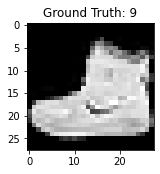

In [5]:
plt.figure(figsize=[5,5])

#kita tampilkan dataset training
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(train_Y[0]))

Text(0.5, 1.0, 'Ground Truth: 9')

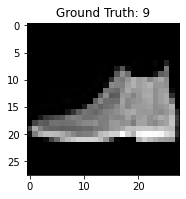

In [6]:
plt.subplot(121)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth: {}".format(test_Y[0]))

In [7]:
train_X = train_X.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [8]:
#Merubah dataset menjadi grayscale
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X/255.

In [9]:
#kita lihat bentuk target label
train_Y_one_cat = to_categorical(train_Y)
test_Y_one_cat = to_categorical(test_Y)
train_Y_one_cat, test_Y_one_cat

(array([[0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [10]:
print('Original Label: ', train_Y[3])
print('Konversi ke one_cat: ', train_Y_one_cat[3])

Original Label:  3
Konversi ke one_cat:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [11]:
#split data training menjadi train dan validasi
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_cat, test_size=0.2, random_state=13)

In [12]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [17]:
batch_size = 64
epochs = 100
num_classes = 10

In [18]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3,3), activation='linear', input_shape=(28,28,1), padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2,2), padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [19]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
fashion_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [20]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size, epochs=epochs, 
                                  verbose=1, validation_data=(valid_X, valid_label))

Epoch 1/100
750/750 [==============================] - 3s 4ms/step - loss: 0.4588 - accuracy: 0.8313 - val_loss: 0.3290 - val_accuracy: 0.8815
Epoch 2/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2843 - accuracy: 0.8957 - val_loss: 0.2790 - val_accuracy: 0.8982
Epoch 3/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2413 - accuracy: 0.9112 - val_loss: 0.2429 - val_accuracy: 0.9114
Epoch 4/100
750/750 [==============================] - 3s 4ms/step - loss: 0.2094 - accuracy: 0.9219 - val_loss: 0.2504 - val_accuracy: 0.9086
Epoch 5/100
750/750 [==============================] - 3s 4ms/step - loss: 0.1822 - accuracy: 0.9325 - val_loss: 0.2478 - val_accuracy: 0.9118
Epoch 6/100
750/750 [==============================] - 3s 4ms/step - loss: 0.1608 - accuracy: 0.9408 - val_loss: 0.2240 - val_accuracy: 0.9178
Epoch 7/100
750/750 [==============================] - 3s 4ms/step - loss: 0.1389 - accuracy: 0.9477 - val_loss: 0.2250 - val_accuracy: 0.9235

In [21]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_cat, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 1.1239 - accuracy: 0.9185


In [22]:
print('Test Loss: ', test_eval[0])
print('Test Accuracy: ', test_eval[1])

Test Loss:  1.123928427696228
Test Accuracy:  0.9185000061988831


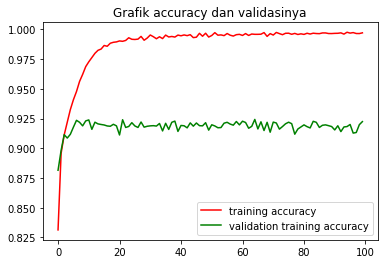

In [29]:
#gambarkan proses training
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b', c='red', label='training accuracy')
plt.plot(epochs, val_accuracy, 'b', c='green', label='validation training accuracy')
plt.title('Grafik accuracy dan validasinya')
plt.legend()


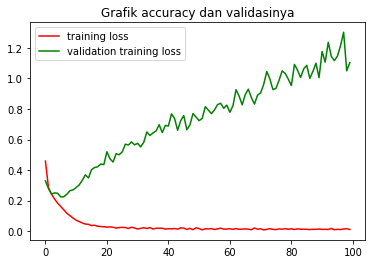

In [30]:
plt.plot(epochs, loss, 'b', c='red', label='training loss')
plt.plot(epochs, val_loss, 'b', c='green', label='validation training loss')
plt.title('Grafik lost dan validasinya')
plt.legend()